In [136]:
import numpy as np 
import matplotlib.pyplot as plt


## 01) Com os valores anotados na Tabela 1, construa o gráfico do módulo do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


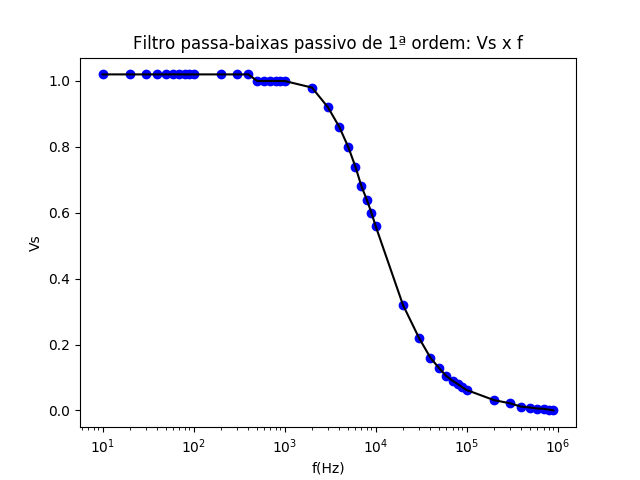

In [188]:
%matplotlib notebook

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000]
v = [1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02,  
     1,  1,  1,  1,  1,  1, 0.98, 0.92, 0.86, 0.8, 0.74, 0.68, 0.64, 0.6, 0.56, 
     0.32, 0.22, 0.16, 0.128, 0.104, 0.09, 0.08, 0.07, 0.062, 0.0312, 0.0216, 
     0.0112, 0.0088, 0.0056, 0.0048, 0.0024, 0]

plt.figure()
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.show()

## 2) Com os valores anotados na Tabela 2, construa o gráfico do módulo da fase do filtro em função da frequência.

<IPython.core.display.Javascript object>


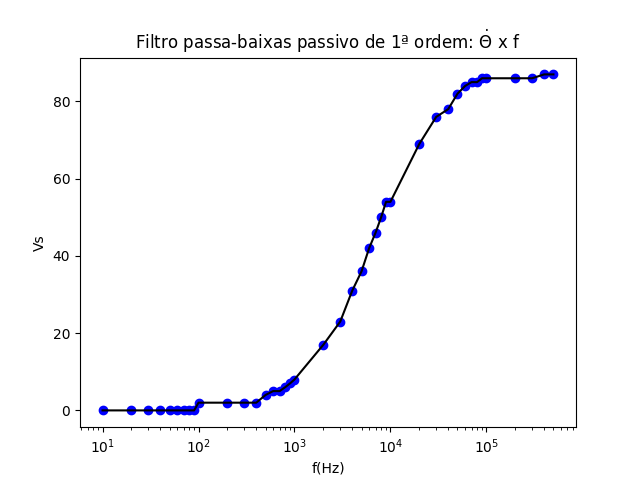

In [189]:
%matplotlib notebook


f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000]
teta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 5, 5, 6, 7, 8, 17, 23, 31, 36, 42, 46, 50, 54, 54, 69, 76, 78, 82, 84, 85, 85, 86, 86, 86, 86, 87, 87] 
plt.figure()
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.show()

## 3) Calcule a frequência de corte do filtro montado na Parte Prática e indique-a nos gráficos construídos nas questões 1 (a) e 3 (b). 

## a) 

<IPython.core.display.Javascript object>


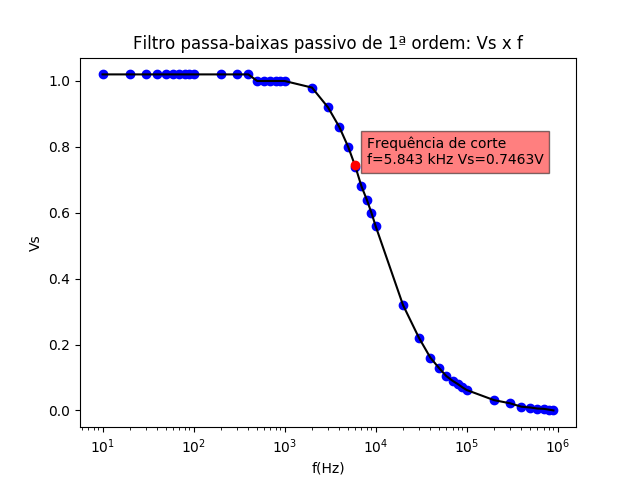

In [190]:
%matplotlib notebook

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000]
v = [1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02,  1,  1,  1,  1,  1,  1, 0.98, 0.92, 0.86, 0.8, 0.74, 0.68, 0.64, 0.6, 0.56, 0.32, 0.22, 0.16, 0.128, 0.104, 0.09, 0.08, 0.07, 0.062, 0.0312, 0.0216, 0.0112, 0.0088, 0.0056, 0.0048, 0.0024, 0]

plt.figure()
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.plot(5894, 0.7463, "or")
plt.text(8000, 0.7463, "Frequência de corte \nf=%.3f kHz Vs=0.7463V" %5.843,  bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.show()

## b) 

<IPython.core.display.Javascript object>


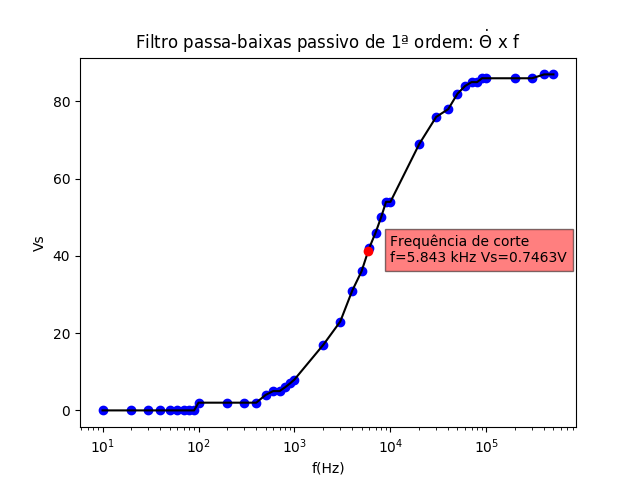

In [191]:
%matplotlib notebook


f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000]
teta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 5, 5, 6, 7, 8, 17, 23, 31, 36, 42, 46, 50, 54, 54, 69, 76, 78, 82, 84, 85, 85, 86, 86, 86, 86, 87, 87] 
plt.figure()
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.plot(5894, 41.364, "or")
plt.text(10000, 38.364, "Frequência de corte \nf=%.3f kHz Vs=0.7463V" %5.843,  bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.show()

## 5) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico do módulo do ganho de tensão do filtro em função da frequência. 


<IPython.core.display.Javascript object>


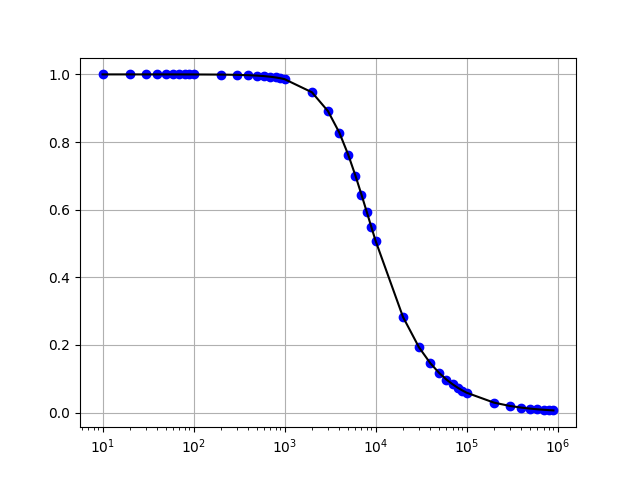

In [194]:
import math

R = 2700
C = 10e-9 

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 
     400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 
     5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000,
     50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000]

g = np.zeros(len(f))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * 3.14 * fi * R * C)**2)

for i in range(len(f)): 
    g[i] = Av(f[i])


plt.figure()
plt.xscale('log')
plt.plot(f, g,'bo', f, g,'k')
plt.plot(0,1)
plt.grid()
plt.show()

## 6) Compare o gráfico obtido na Questão 5 com o construído na Questão 1. 

Erro quadrático médio = 0.000206


<IPython.core.display.Javascript object>


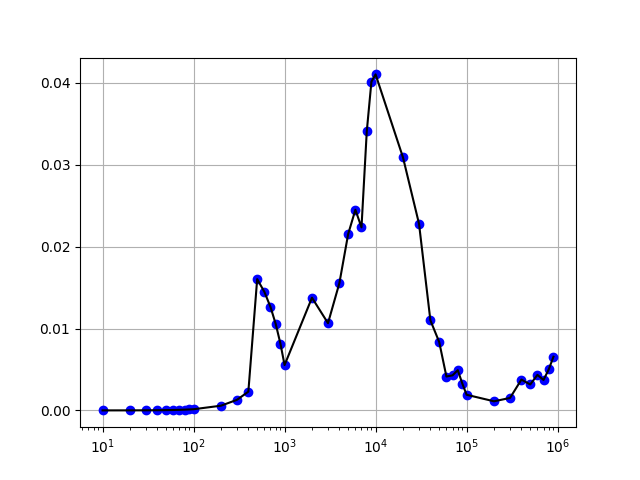

In [204]:
import math
from sklearn.metrics import mean_squared_error 

R = 2700
C = 10e-9 

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 
     400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 
     5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000,
     50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000]

g = np.zeros(len(f))


def normalizar_dados(dados: object):
    return (dados - np.min(dados, axis=0)) / (np.max(dados, axis=0) - np.min(dados, axis=0))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * 3.14 * fi * R * C)**2)


for i in range(len(f)): 
    g[i] = Av(f[i])


vn = normalizar_dados(v)
err = mean_squared_error(g, vn)
print("Erro quadrático médio = %f" %err)
diff = abs(vn-g)

plt.figure()
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'k')
plt.grid()
plt.show()

## 7) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico da fase do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


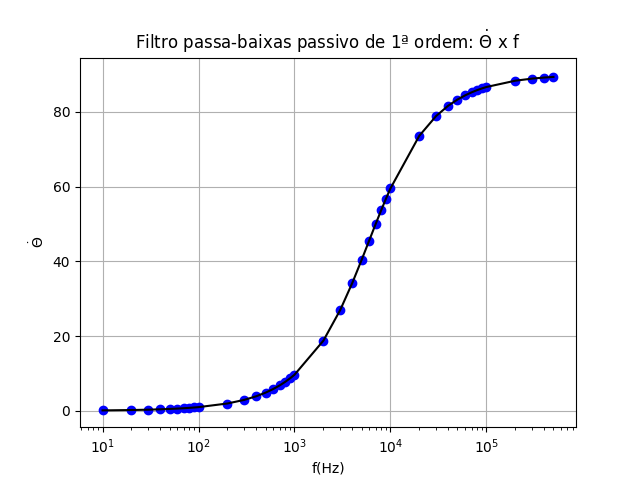

In [198]:
import math

R = 2700
C = 10e-9 

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000]

fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])


plt.figure()
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_Av,'bo', f, fase_Av,'k')
plt.plot(0,90)
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 8) Compare o gráfico obtido na Questão 7 com o construído na Questão 3. 

Erro quadrático médio = 5.261357


<IPython.core.display.Javascript object>


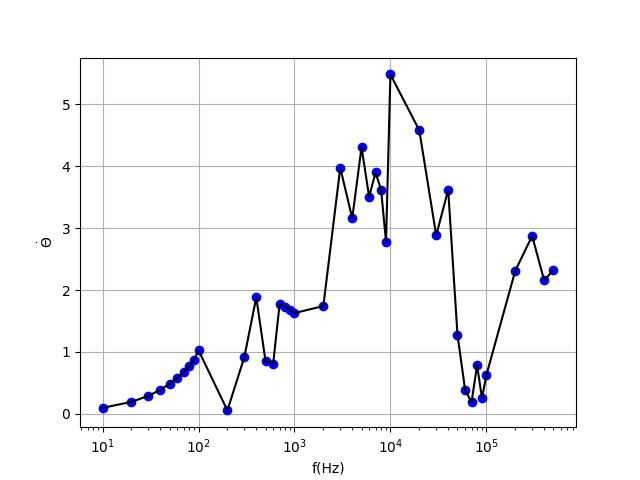

In [205]:
import math

R = 2700
C = 10e-9 

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000]

fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])

teta = np.array(teta)

diff = abs(fase_Av-teta)
err = mean_squared_error(fase_Av, teta)
print("Erro quadrático médio = %f" %err)

plt.figure()
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'k')
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

# Filtro de Segunda Ordem 